In [21]:
import numpy as np
import pandas as p
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_csv("rym_top_5000_all_time.csv")

In [25]:
df

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379
...,...,...,...,...,...,...,...,...,...
4995,4996.0,Gracious!,Gracious,17 July 1970,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32
4996,4997.0,Knights of the Cross,Grave Digger,18 May 1998,"Power Metal, Heavy Metal","history, male vocals, heavy, concept album, an...",3.67,562,11
4997,4998.0,(Listen For) The Rag and Bone Man,And Also the Trees,12 November 2007,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15
4998,4999.0,Hymnen für elektronische und konkrete Klänge,Studio für elektronische Musik des Westdeutsch...,1969,"Musique concrète, Modern Classical, Electronic","avant-garde, sampling, dense, complex, scary, ...",3.65,536,11


In [67]:
artis_with_5_alb=df.groupby(["Artist Name","Album"]).size().reset_index().rename(columns={0: 'Count0'}).reset_index(drop = True)
artis_with_5_alb.loc[artis_with_5_alb['Count0'] > 1, 'Count0'] = 1
artis_with_5_alb1=df.groupby(["Artist Name"]).size().reset_index().rename(columns={0: 'Count'}).query("Count>5").reset_index()
artis_with_5_alb=artis_with_5_alb1['Artist Name'].tolist()
artis_with_5_alb1=artis_with_5_alb1.sort_values("Count", ascending=False).reset_index(drop = True).head(10)

In [68]:
#zadanie 1
df1=df[df['Artist Name'].isin(artis_with_5_alb)]
df1=df1.groupby("Artist Name")['Average Rating'].apply(np.median).reset_index().rename(columns={"Average Rating":"Median Rating"})
df1=df1.sort_values("Median Rating", ascending=False).reset_index(drop = True)
df1=df1.head(10)
df1

,Artist Name,Median Rating
0,David Bowie,4.050
1,The Beatles,4.045
2,King Crimson,3.970
3,The Rolling Stones,3.965
4,Black Sabbath,3.950
5,Led Zeppelin,3.940
6,Pink Floyd,3.910
7,Death,3.905
8,John Coltrane,3.905
9,Bob Dylan,3.890


In [33]:
#zadanie 2
df2=df.groupby("Artist Name")['Average Rating'].apply(np.min).reset_index().rename(columns={"Average Rating":"MinRating"})
df22=df.groupby("Artist Name")['Average Rating'].apply(np.max).reset_index().rename(columns={"Average Rating":"MaxRating"})
df2= pd.merge(df2, df22, how='inner', left_on='Artist Name', right_on='Artist Name')
df2['Difference'] = df2['MaxRating'] - df2['MinRating']
df2.sort_values("Difference", ascending=False).reset_index(drop = True).head(10)

,Artist Name,MinRating,MaxRating,Difference
0,Kendrick Lamar,3.52,4.27,0.75
1,The Beatles,3.55,4.25,0.70
2,Pink Floyd,3.60,4.29,0.69
3,My Bloody Valentine,3.58,4.24,0.66
4,King Crimson,3.67,4.30,0.63
5,John Coltrane,3.70,4.30,0.60
6,Radiohead,3.66,4.23,0.57
7,Miles Davis,3.69,4.23,0.54
8,The Cure,3.63,4.17,0.54
9,Kanye West,3.54,4.07,0.53


In [103]:
#zadanie 3
df3=df
df3["Number of Ratings"]=df.iloc[:,7].astype(str).apply(lambda x: str(x.replace(',',''))).astype(int)
df3=df3[df3["Number of Reviews"]>15]
df3=df3[df3["Number of Ratings"]>5000]
df3['Ratio'] = df3["Number of Ratings"] / df3["Number of Reviews"]
df3.sort_values("Ratio", ascending=False).reset_index(drop = True).head(10)

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews,Ratio
0,354.0,Jenny Death: The Powers That B Disc 2,Death Grips,19 March 2015,"Experimental Hip Hop, Noise Rock, Industrial H...","noisy, abstract, aggressive, male vocals, mani...",3.90,10855,30,361.833333
1,1696.0,Bury Me at Makeout Creek,Mitski,11 November 2014,"Indie Rock, Singer/Songwriter","lonely, anxious, passionate, suicide, raw, fem...",3.77,5856,19,308.210526
2,3734.0,春と修羅 (Haru to Shura),春ねむり [Haru Nemuri],11 April 2018,"Noise Pop, J-Rock, J-Pop","female vocals, energetic, passionate, rhythmic...",3.67,6277,23,272.913043
3,4950.0,Saturation,Brockhampton,9 June 2017,"Pop Rap, West Coast Hip Hop","eclectic, boastful, male vocals, LGBT, vulgar,...",3.55,17629,70,251.842857
4,1037.0,Saturation III,Brockhampton,15 December 2017,"Pop Rap, West Coast Hip Hop","quirky, male vocals, introspective, LGBT, boas...",3.74,17118,68,251.735294
5,2490.0,Scenery,福居良 [Ryo Fukui],1976,Hard Bop,"instrumental, playful, warm, summer, happy, me...",3.73,5968,24,248.666667
6,644.0,Endless,Frank Ocean,9 April 2018,"Ambient Pop, Alternative R&B, Art Pop","atmospheric, ethereal, mellow, male vocals, me...",3.85,8911,39,228.487179
7,2870.0,Imperial,Denzel Curry,9 March 2016,"Southern Hip Hop, Trap","angry, political, aggressive, crime, urban, dr...",3.66,11271,50,225.420000
8,951.0,Saturation II,Brockhampton,25 August 2017,"Pop Rap, West Coast Hip Hop","LGBT, boastful, summer, male vocals, playful, ...",3.74,18322,85,215.552941
9,440.0,Bottomless Pit,Death Grips,6 May 2016,"Industrial Hip Hop, Abstract Hip Hop, Experime...","aggressive, chaotic, noisy, manic, energetic, ...",3.82,20614,102,202.098039


In [23]:
df4=df
df4["Number of Ratings"]=df.iloc[:,7].astype(str).apply(lambda x: str(x.replace(',',''))).astype(int)
q3_ratings=df4["Number of Ratings"].quantile(.75)
q3_reviews=df4["Number of Reviews"].quantile(.75)
df4a=df4[df4["Number of Reviews"]>q3_reviews]
df4a["Release Date"]=pd.DatetimeIndex(df4a.loc[:,'Release Date']).year
df4a=df4a.groupby("Release Date").size().reset_index().rename(columns={0: 'Count'})
df4a=df4a.sort_values("Count", ascending=False).reset_index(drop = True).head(10)
df4a.head(5)

,Release Date,Count
0,1970,43
1,1971,41
2,1969,38
3,1994,36
4,1995,34


In [56]:
df4b=df4[df4["Number of Ratings"]>q3_ratings]
df4b["Release Date"]=pd.DatetimeIndex(df4b.loc[:,'Release Date']).year
df4b=df4b.groupby("Release Date").size().reset_index().rename(columns={0: 'Count'})
df4b=df4b.sort_values("Count", ascending=False).reset_index(drop = True)
df4b.head(5)

,Release Date,Count
0,1994,41
1,1971,36
2,1970,35
3,1996,34
4,1995,33


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

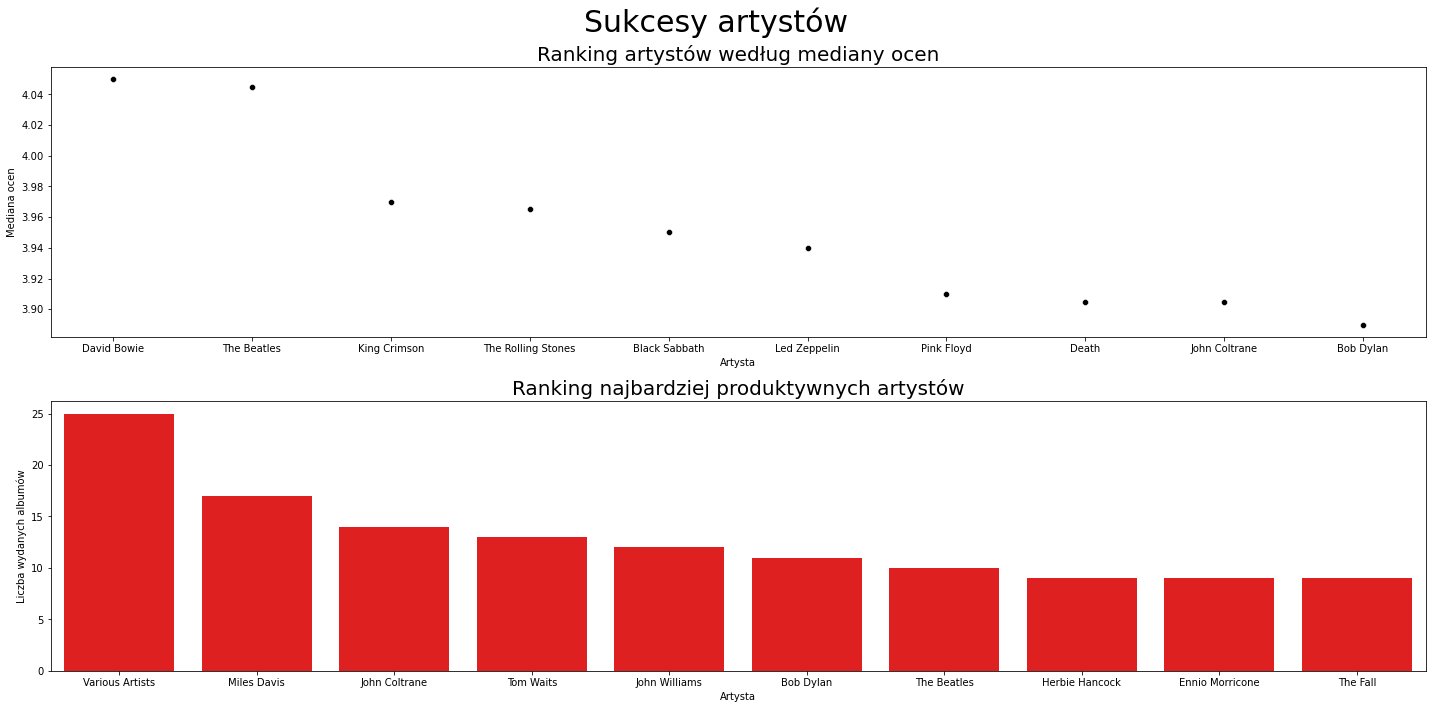

In [84]:
fig, ax = plt.subplots(2, 1,figsize=(20,10))

fig.suptitle('Sukcesy artystów',fontsize=30)
ax[0].set_title('Ranking artystów według mediany ocen',fontsize=20)
ax[1].set_title('Ranking najbardziej produktywnych artystów',fontsize=20)
sns.scatterplot(data=df1, x='Artist Name', y='Median Rating',color='black',ax=ax[0])
sns.barplot(data=artis_with_5_alb1, x='Artist Name', y='Count',color='red', ax=ax[1])
ax[0].set(xlabel='Artysta', ylabel='Mediana ocen')
ax[1].set(xlabel='Artysta', ylabel='Liczba wydanych albumów')
fig.tight_layout()

plt.show()